In [1]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=df7188dbcc1d4fe8c9949dee14f77e5b4c65560becc0939211ed9fd68d303c0b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


### 1. 그리스 문자

```$ \alpha $``` 처럼 입력하면 그리스 문자를 출력해 준다.

$\epsilon$

In [2]:
from IPython.display import display, Latex
display(Latex(r"$\alpha$"))
display(Latex(r"$\epsilon$"))
display(Latex(r"$\psi$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Q1. 슬라이드에서 못 읽는 문자를 출력해 보세요.

In [9]:
display(Latex(r'$\zeta$'))
display(Latex(r'$\psi$'))
display(Latex(r'$\xi$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 2. Data Type

In [10]:
import pandas as pd

In [29]:
cat = pd.Categorical(['Venti','Medium','Medium', 'Tall','Venti','Short','Venti'], # 자료
                     ['Medium', 'Tall', 'Venti'],ordered=True) # category는  ['Medium', 'Tall', 'Venti']뿐
cat = pd.Series(cat)
df = pd.DataFrame({"Person": ["Harry", "Hermione", "Ron", "Neville", "Sirius", "Albus", "Luna"], "Size": cat})

In [26]:
cat

0     Venti
1    Medium
2    Medium
3      Tall
4     Venti
5       NaN
6     Venti
dtype: category
Categories (3, object): ['Medium' < 'Tall' < 'Venti']

In [12]:
df['Size'].dtype

CategoricalDtype(categories=['Medium', 'Tall', 'Venti'], ordered=True)

In [13]:
df.Size.max()

'Venti'

In [20]:
df

,Person,Size,Count
0,Harry,Venti,3.0
1,Hermione,Medium,3.0
2,Ron,Medium,2.0
3,Neville,Tall,2.0
4,Sirius,Venti,1.0
5,Albus,NaN,5.0
6,Luna,Venti,3.0
0,NaN,NaN,NaN


<AxesSubplot:xlabel='Size'>

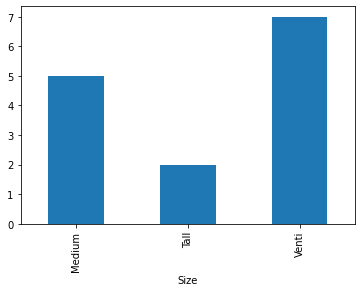

In [14]:
df['Count'] = [3,3,2,2,1,5,3]
df.groupby('Size')['Count'].sum().plot.bar()

In [91]:
!pip install seaborn

     |████████████████████████████████| 292 kB 565 kB/s eta 0:00:01
  Using cached scipy-1.7.3-cp37-cp37m-macosx_10_9_x86_64.whl (33.0 MB)


<AxesSubplot:xlabel='Size', ylabel='Count'>

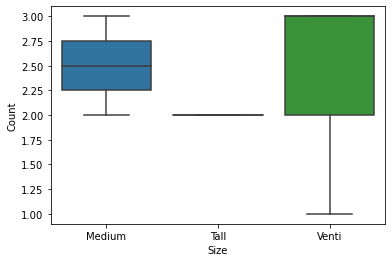

In [18]:
import seaborn as sns
sns.boxplot(x='Size', y='Count', data=df)

In [27]:
df.loc['0', 'Size']

nan

In [28]:
df.loc[0, 'Size'] = 'Venti' #'Short'는 안됨

In [94]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 5.1 MB/s eta 0:00:01


(<Figure size 432x288 with 3 Axes>,
 {('Medium', 'N'): (0.0, 0.0, 0.33003300330033003, 0.4983388704318937),
  ('Medium', 'Y'): (0.0,
   0.5016611295681063,
   0.33003300330033003,
   0.4983388704318937),
  ('Tall', 'N'): (0.334983498349835,
   0.0,
   0.16501650165016504,
   0.9966777408637874),
  ('Tall', 'Y'): (0.334983498349835, 1.0, 0.16501650165016504, 0.0),
  ('Venti', 'N'): (0.504950495049505,
   0.0,
   0.49504950495049505,
   0.6644518272425248),
  ('Venti', 'Y'): (0.504950495049505,
   0.6677740863787375,
   0.49504950495049505,
   0.33222591362126247)})

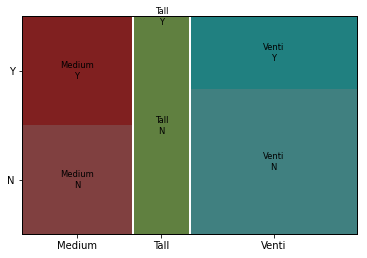

In [30]:
from statsmodels.graphics.mosaicplot import mosaic
df['Sugar'] = ['Y']*2 + ['N']*5
mosaic(df, ['Size','Sugar'])

In [31]:
%matplotlib inline
import matplotlib.pylab as plt

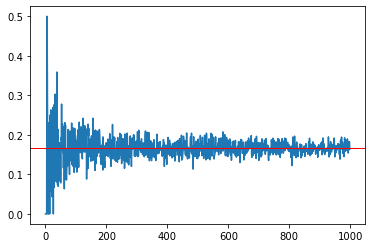

In [32]:
# LLN 시각화!

import random
result = []
for trial in range(1, 1000):
    res = []
    for i in range(0, trial):
        n = random.randint(1,6)
        res.append(n)
    p = res.count(1)/trial
    result.append(p)
pd.Series(result).plot()
plt.axhline(y=1/6, color='r', linewidth=1)

In [41]:
import numpy as np
location = ['서울','경기','인천','강원','충남','충북','대전','전북','전남','광주','경북','대구','부산','울산','경남','제주','세종']
age = [10, 20, 30, 40 ]
gender = ['M','F','E']
party = ['Red', 'Blue']
df = pd.DataFrame()                                                                                                                                                                     
N = 1000                                                                                                                                                                                
df["location"] = np.random.choice(location, size=N, p=[0.1,0.1,0.1]+[0.05]*14)                                                                                                                                     
df["age"] = np.random.choice(range(20, 80), size=N)                                                                                                                                               
df["gender"] = np.random.choice(gender, p = [0.495, 0.495, 0.01], size=N)  
df['party'] = df.apply(lambda x: np.random.choice(party, p=[0.1, 0.9]) if x['location']=='대전' else np.random.choice(party), axis=1)
df

,location,age,gender,party
0,세종,65,F,Red
1,부산,20,F,Red
2,전북,55,F,Blue
3,부산,22,M,Red
4,경남,70,F,Blue
...,...,...,...,...
995,대전,61,M,Red
996,충북,46,M,Blue
997,강원,78,M,Blue
998,인천,41,F,Red


#### Q2. 임의의 1명을 골랐을 때, 그 사람이 대전 사람일 확률은?

In [42]:
p_dj =len(df[df['location'] == '대전'])/len(df)
p_dj

0.048

#### Q3. 임의의 1명을 골랐을 때, 그 사람이 Blue 당을 지지할 확률은?

In [44]:
p_blue = len(df[df['party'] == 'Blue']) / len(df)
p_blue

0.501

#### Q4. 대전 사람일 때, 그 사람이 Blue 당을 지지할 확률은?

In [45]:
p_db = len(df[(df['party'] == 'Blue') & (df['location']=='대전')]) / len(df)
p_db / p_dj

0.875

#### 대